In [5]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

Using TensorFlow backend.


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# 학습된 파일 가져오기
from keras.models import load_model
model = load_model('facial_key.h5')

In [304]:
import PIL.Image as pilimg
 
# 이미지 가져오기
im = pilimg.open('../all (1)/yunhyuck2.png').convert('LA')
 
# 픽셀로 변환
pix = np.array(im)

In [305]:
# 학습데이터에 맞게 픽셀 배열 변환
pix = np.resize(pix,(1,96,96,1))
pix = pix/255

In [306]:
# 모델 예측
pred = model.predict(pix)

In [307]:
# 예측된 값 확인
pred

array([[62.46214 , 35.457363, 28.437685, 35.78022 , 55.80741 , 34.823887,
        69.42743 , 33.91303 , 35.05321 , 36.685043, 20.886147, 37.222263,
        51.350285, 28.051643, 75.640755, 27.10702 , 36.764725, 29.94286 ,
        14.328603, 31.865145, 45.59754 , 58.429672, 64.778465, 69.25501 ,
        31.71926 , 72.2424  , 47.238655, 70.320724, 45.764492, 74.4437  ]],
      dtype=float32)

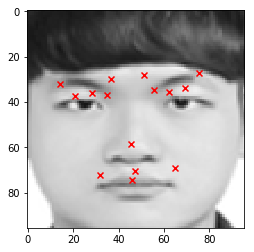

In [308]:
# 출력
pt = np.vstack(np.split(pred[0],15)).T
plt.scatter(pt[0],pt[1],c='red',marker = 'x')
plt.imshow(im)

In [357]:
import skimage.color
from skimage.filters import median

In [377]:
# 수염사진 업로드 
moustache = plt.imread('../all (1)/mustache-png-1317.png')
moustache = skimage.color.rgb2gray(moustache) # RGB 값 계산

In [378]:
moustache = median(moustache, selem=np.ones((3, 3))) # 수염의 중간 값 계산

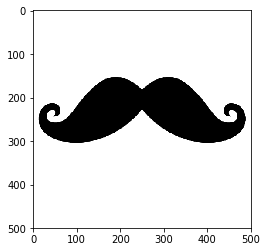

In [379]:
plt.imshow(moustache, cmap='gray') # 수염 사진 출력

In [380]:
from skimage import measure
moustache_contour = measure.find_contours(moustache, 0.8)[0] #  윤곽선 추출
moustache_contour -= np.array([250, 250])

In [393]:
# 주어진 위치에 윤곽선을 그려주는 함수
def plot_scaled_moustache(ax, center_xy, dx):
    moustache_scaled = moustache_contour.copy()
    moustache_scaled -= moustache_contour.min(axis=0)
    moustache_scaled /= moustache_scaled.max(axis=0)[1]
    deltas = moustache_scaled.max(axis=0) - moustache_scaled.min(axis=0)
    moustache_scaled -= np.array([deltas[0]/2, deltas[1]/2])
    moustache_scaled *= dx
    moustache_scaled += center_xy[::-1]
    ax.fill(moustache_scaled[:, 1], moustache_scaled[:, 0], 'black', linewidth=4)

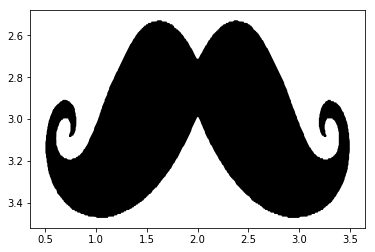

In [394]:
ax = plt.gca()
plot_scaled_moustache(ax, np.array([2, 3]), dx=3)
ax.invert_yaxis()

In [395]:
# 예측된 지점의 함수와 통합 (입 위치)
def draw_moustache(predicted_points, ax):
    dx = 2 * np.linalg.norm(predicted_points[12, :] - predicted_points[11, :])
    center_xy = predicted_points[13, :]
    plot_scaled_moustache(ax, center_xy, dx)

In [396]:
# 예측된 값에 대해 배열 재정의
xy_predictions = pred.reshape(15, 2)

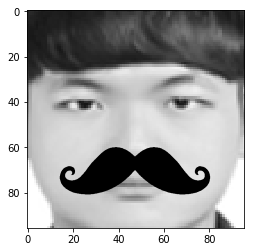

In [398]:
fig, ax = plt.subplots()
ax.imshow(im, 'gray')
draw_moustache(xy_predictions, ax)